<a href="https://colab.research.google.com/github/S-MANU/MANU-S/blob/main/Retail_e_commerce_sales_inactive_(2016_2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects /Keggle sets/20100072.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects /Keggle sets/20100072_MetaData.csv')

In [4]:
df1.head()
df2.head()

,Cube Title,Product Id,CANSIM Id,URL,Cube Notes,Archive Status,Frequency,Start Reference Period,End Reference Period,Total number of dimensions
"Retail e-commerce sales, inactive",20100072,080-0033,https://www150.statcan.gc.ca/t1/tbl1/en/tv.act...,1;2;5,ARCHIVED - a cube publicly available but no l...,Monthly,2016-01-01,2022-12-01,2.0,NaN
Dimension ID,Dimension name,Dimension Notes,Dimension Definitions,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sales,3;4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dimension ID,Member Name,Classification Code,Member ID,Parent Member ID,Terminated,Member Notes,Member Definitions,NaN,NaN,NaN


In [ ]:
print(df1.shape)
print(df2.shape)

(336, 15)
(40, 10)


In [ ]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REF_DATE       336 non-null    object 
 1   GEO            336 non-null    object 
 2   DGUID          336 non-null    object 
 3   Sales          336 non-null    object 
 4   UOM            336 non-null    object 
 5   UOM_ID         336 non-null    int64  
 6   SCALAR_FACTOR  336 non-null    object 
 7   SCALAR_ID      336 non-null    int64  
 8   VECTOR         336 non-null    object 
 9   COORDINATE     336 non-null    float64
 10  VALUE          336 non-null    int64  
 11  STATUS         336 non-null    object 
 12  SYMBOL         0 non-null      float64
 13  TERMINATED     0 non-null      float64
 14  DECIMALS       336 non-null    int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 39.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, Retail e-commerce sales, in

In [5]:
df1 = df1.drop(columns=['TERMINATED', 'SYMBOL'])


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REF_DATE       336 non-null    object 
 1   GEO            336 non-null    object 
 2   DGUID          336 non-null    object 
 3   Sales          336 non-null    object 
 4   UOM            336 non-null    object 
 5   UOM_ID         336 non-null    int64  
 6   SCALAR_FACTOR  336 non-null    object 
 7   SCALAR_ID      336 non-null    int64  
 8   VECTOR         336 non-null    object 
 9   COORDINATE     336 non-null    float64
 10  VALUE          336 non-null    int64  
 11  STATUS         336 non-null    object 
 12  DECIMALS       336 non-null    int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 34.2+ KB


In [7]:
df1['REF_DATE'] = pd.to_datetime(df1['REF_DATE'])

In [16]:
df1.REF_DATE

0     2016-01-01
1     2016-01-01
2     2016-01-01
3     2016-01-01
4     2016-02-01
         ...    
331   2022-11-01
332   2022-12-01
333   2022-12-01
334   2022-12-01
335   2022-12-01
Name: REF_DATE, Length: 336, dtype: datetime64[ns]

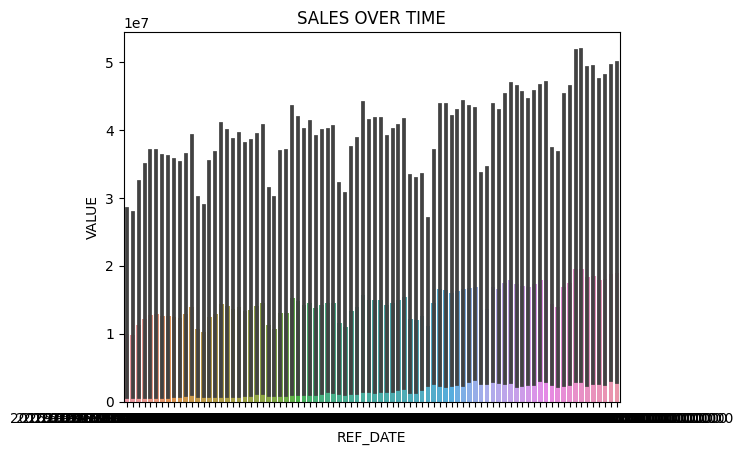

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df1, x='REF_DATE', y= 'VALUE')
plt.title('SALES OVER TIME')
plt.show()

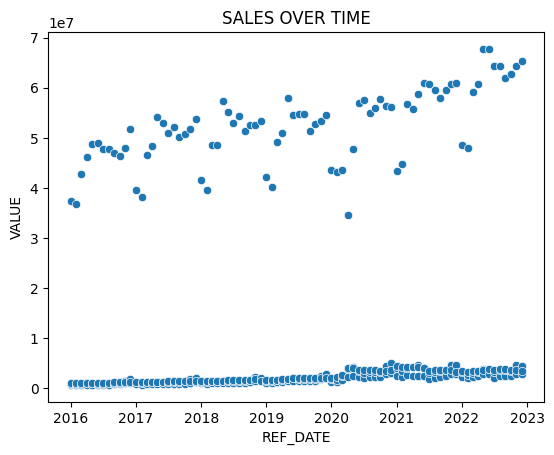

In [9]:
sns.scatterplot(data=df1, x='REF_DATE',y='VALUE')
plt.title('SALES OVER TIME')
plt.show()

In [10]:
df1.head(2)

,REF_DATE,GEO,DGUID,Sales,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,DECIMALS
0,2016-01-01,Canada,2016A000011124,"Retail trade, unadjusted\n [44-453]",Dollars,81,thousands,3,v108795018,1.1,37415147,A,0
1,2016-01-01,Canada,2016A000011124,"Electronic shopping and mail-order houses, una...",Dollars,81,thousands,3,v108795019,1.2,679612,B,0


In [11]:
geo_sales = df1.groupby('GEO')['VALUE'].sum().reset_index()

In [12]:
import plotly.express as px

fig = px.choropleth(geo_sales,
                    locations = 'GEO',
                    locationmode = 'country names',
                    color = 'VALUE',
                    hover_name = 'GEO',
                    color_continuous_scale='Viridis',
                    title = 'SALES BY REGION')

fig.update_geos(projection_type = 'natural earth')
fig.show()

In [13]:
category_sales = df1.groupby('Sales')['VALUE'].sum().reset_index()
category_sales = category_sales.sort_values(by='VALUE', ascending=False)

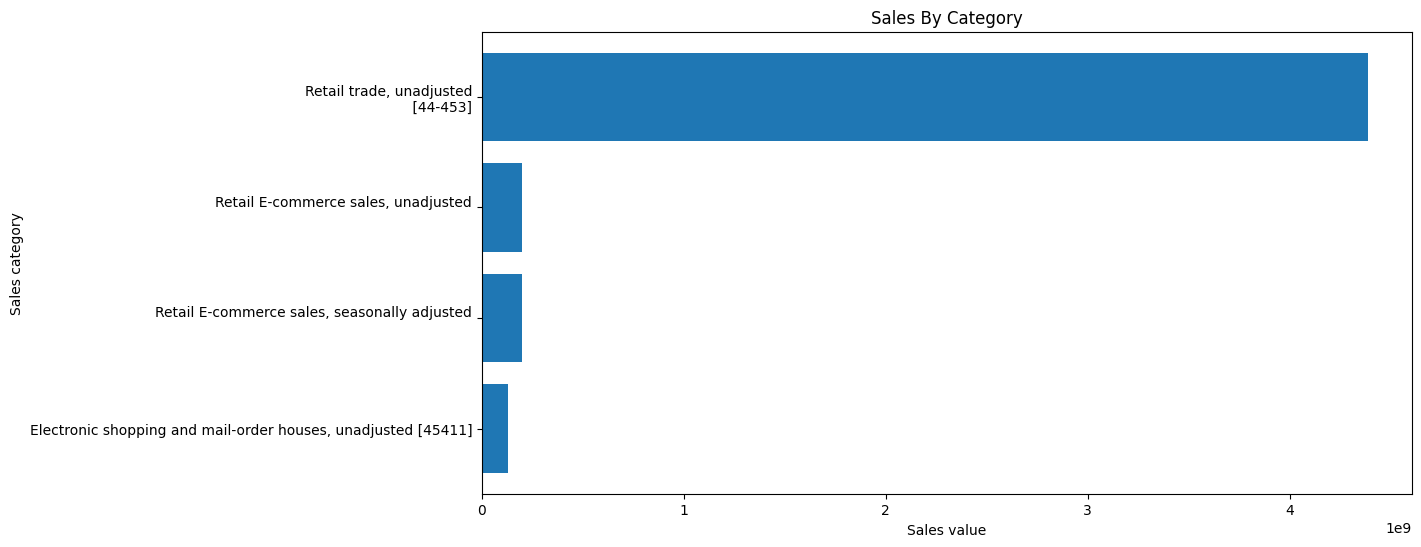

In [14]:
plt.figure(figsize=(12,6))
plt.barh(category_sales['Sales'], category_sales['VALUE'])
plt.xlabel('Sales value')
plt.ylabel('Sales category')
plt.title('Sales By Category')
plt.gca().invert_yaxis()
plt.show()

In [15]:
category_sales['Percentage'] = (category_sales['VALUE'] / category_sales['VALUE'].sum()) * 100

In [16]:
electronics_data = df1[df1['Sales']== 'Electronics']

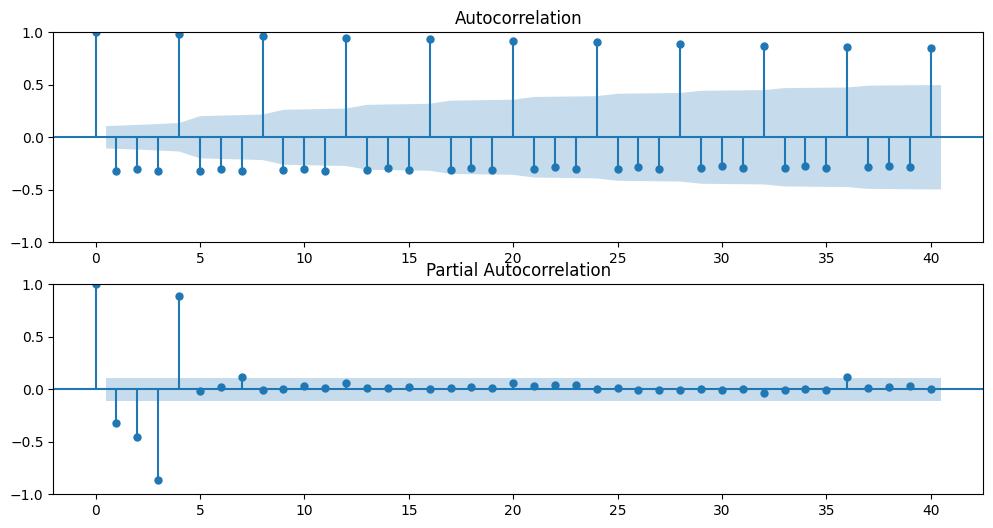

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, (ax1, ax2) =  plt.subplots(2,1, figsize=(12,6))
plot_acf(df1['VALUE'],lags=40, ax=ax1 )
plot_pacf(df1['VALUE'], lags=40, ax=ax2)
plt.show()

In [23]:
import scipy.stats as stats

sales_2016 = df1[df1['REF_DATE'].dt.year==2016]['VALUE']
sales_2017 = df1[df1['REF_DATE'].dt.year==2017]['VALUE']

#performing two sample test
t_statistic, p_value = stats.ttest_ind(sales_2016, sales_2017)

alpha = 0.05

if p_value <= alpha:
  print('Reject the null hypothesis. There is a significant difference in e-commerce sales between 2016 and 2017.')
else:
  print("Fail to reject the null hypothesis. There is no significant difference in e-commerce sales between 2016 and 2017.")

Fail to reject the null hypothesis. There is no significant difference in e-commerce sales between 2016 and 2017.


In [27]:
df2.columns

Index(['Cube Title', 'Product Id', 'CANSIM Id', 'URL', 'Cube Notes',
       'Archive Status', 'Frequency', 'Start Reference Period',
       'End Reference Period', 'Total number of dimensions'],
      dtype='object')

In [28]:
df2.columns

Index(['Cube Title', 'Product Id', 'CANSIM Id', 'URL', 'Cube Notes',
       'Archive Status', 'Frequency', 'Start Reference Period',
       'End Reference Period', 'Total number of dimensions'],
      dtype='object')

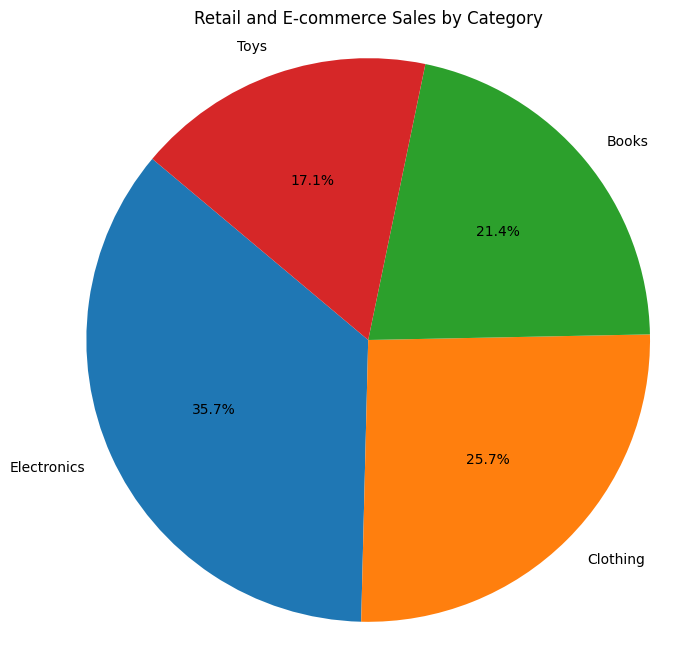

In [26]:
categories = ['Electronics','Clothing', 'Books', 'Toys']
sales = [25000, 18000, 15000, 12000]
plt.figure(figsize=(8, 8))
plt.pie(sales, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Retail and E-commerce Sales by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

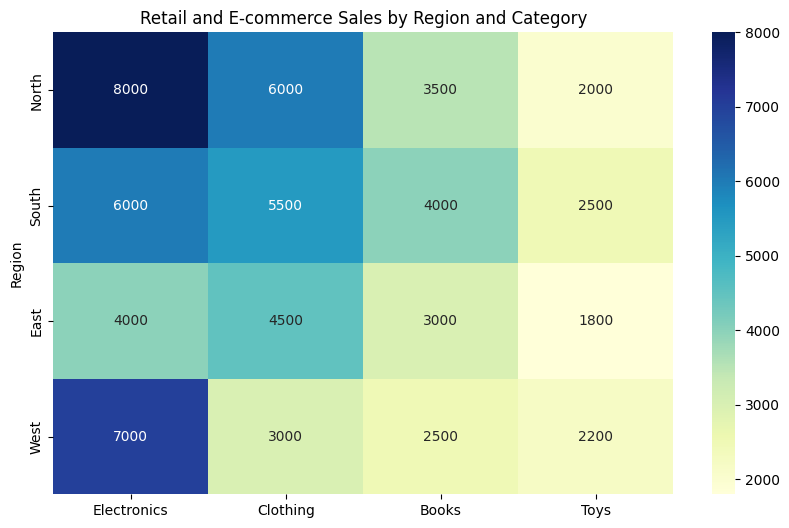

In [29]:
data = {
    'Region': ['North', 'South', 'East', 'West'],
    'Electronics': [8000, 6000, 4000, 7000],
    'Clothing': [6000, 5500, 4500, 3000],
    'Books': [3500, 4000, 3000, 2500],
    'Toys': [2000, 2500, 1800, 2200]
}

df = pd.DataFrame(data)

df.set_index('Region', inplace=True)

plt.figure(figsize=(10,6))
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt='g', cbar=True)
plt.title('Retail and E-commerce Sales by Region and Category')
plt.show()